**PROBLEM STATEMENT:**
Use Naive Bayes to predict whether income exceeds $50K/yr based on census data. Also known as the "Census Income" dataset.


IMPORT DATA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/adult.csv")

DISPLAY DATA

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.drop(columns=['sex',"race","fnlwgt","capital.gain","capital.loss"],inplace=True)

In [ ]:
data.duplicated().sum()

5598

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data['income'].value_counts()

,count
income,
<=50K,20340
>50K,6623


In [ ]:
data.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,18,United-States,<=50K
2,66,?,Some-college,10,Widowed,?,Unmarried,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,40,United-States,<=50K


**DATA PREPROCESSING**

HANDLING MISSING DATA

NULL VALUES ARE FILLED WITH "?" WE HAVE TO REPLACE THEM WITH MEAN OR MODE DEPENDING UPON TYPE OF DATA

In [ ]:
categorical_columns =data.select_dtypes(include=['object']).columns

continous_columns =data.select_dtypes(include=["int64"]).columns

for col in categorical_columns:

 data[col].replace("?",data[col].mode()[0],inplace=True)

for col in continous_columns:
 data[col].replace("?",data[col].median(),inplace=True)

<ipython-input-311-dd02ac96b62d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace("?",data[col].mode()[0],inplace=True)
<ipython-input-311-dd02ac96b62d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
data.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,18,United-States,<=50K
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,40,United-States,<=50K


**HANDLING OUTLIERS**

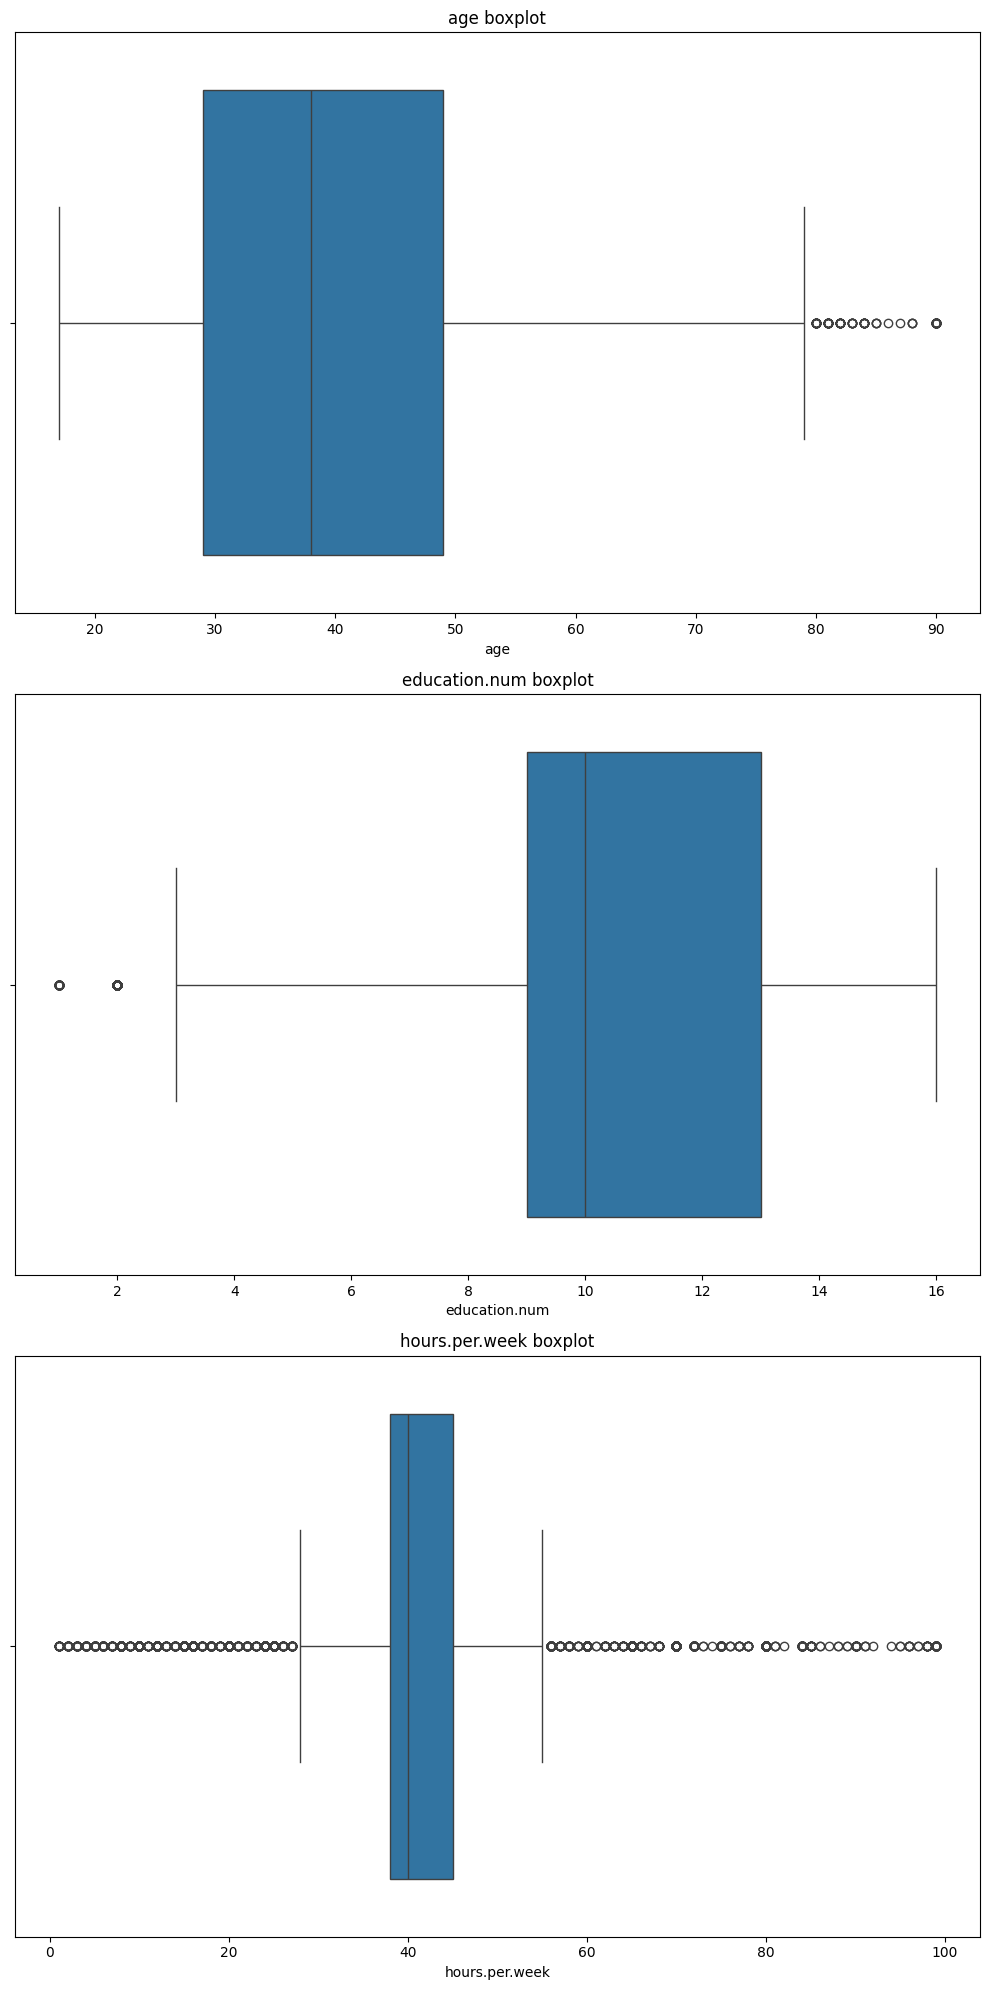

In [ ]:
fig, axs = plt.subplots(3,1,figsize=(10,20))

for i,col in enumerate(continous_columns):
  sns.boxplot(data=data,x=col,ax=axs[i]).set(title=f"{col} boxplot")
plt.tight_layout()
plt.show()

In [ ]:
data.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,18,United-States,<=50K
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,40,United-States,<=50K


In [ ]:
continous_columns

Index(['age', 'education.num', 'hours.per.week'], dtype='object')

In [ ]:
for col in continous_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Counting outliers
    print(outliers.shape)

(118, 10)
(216, 10)
(6019, 10)


In [ ]:

for col in continous_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data =data[(data[col] < upper_bound) & (data[col] > lower_bound)]
    print(data.shape,col)


(26823, 10) age
(26289, 10) education.num
(20449, 10) hours.per.week


In [ ]:
data.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,hours.per.week,native.country,income
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,40,United-States,<=50K
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,45,United-States,<=50K
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,40,United-States,<=50K


LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder


data['income']=data['income'].map({"<=50K":0,">50K":1})
label_encoder = LabelEncoder()

for col in categorical_columns:
  if col!='income':
   data[col]=label_encoder.fit_transform(data[col])


SCALING

In [ ]:
continous_columns

Index(['age', 'education.num', 'hours.per.week'], dtype='object')

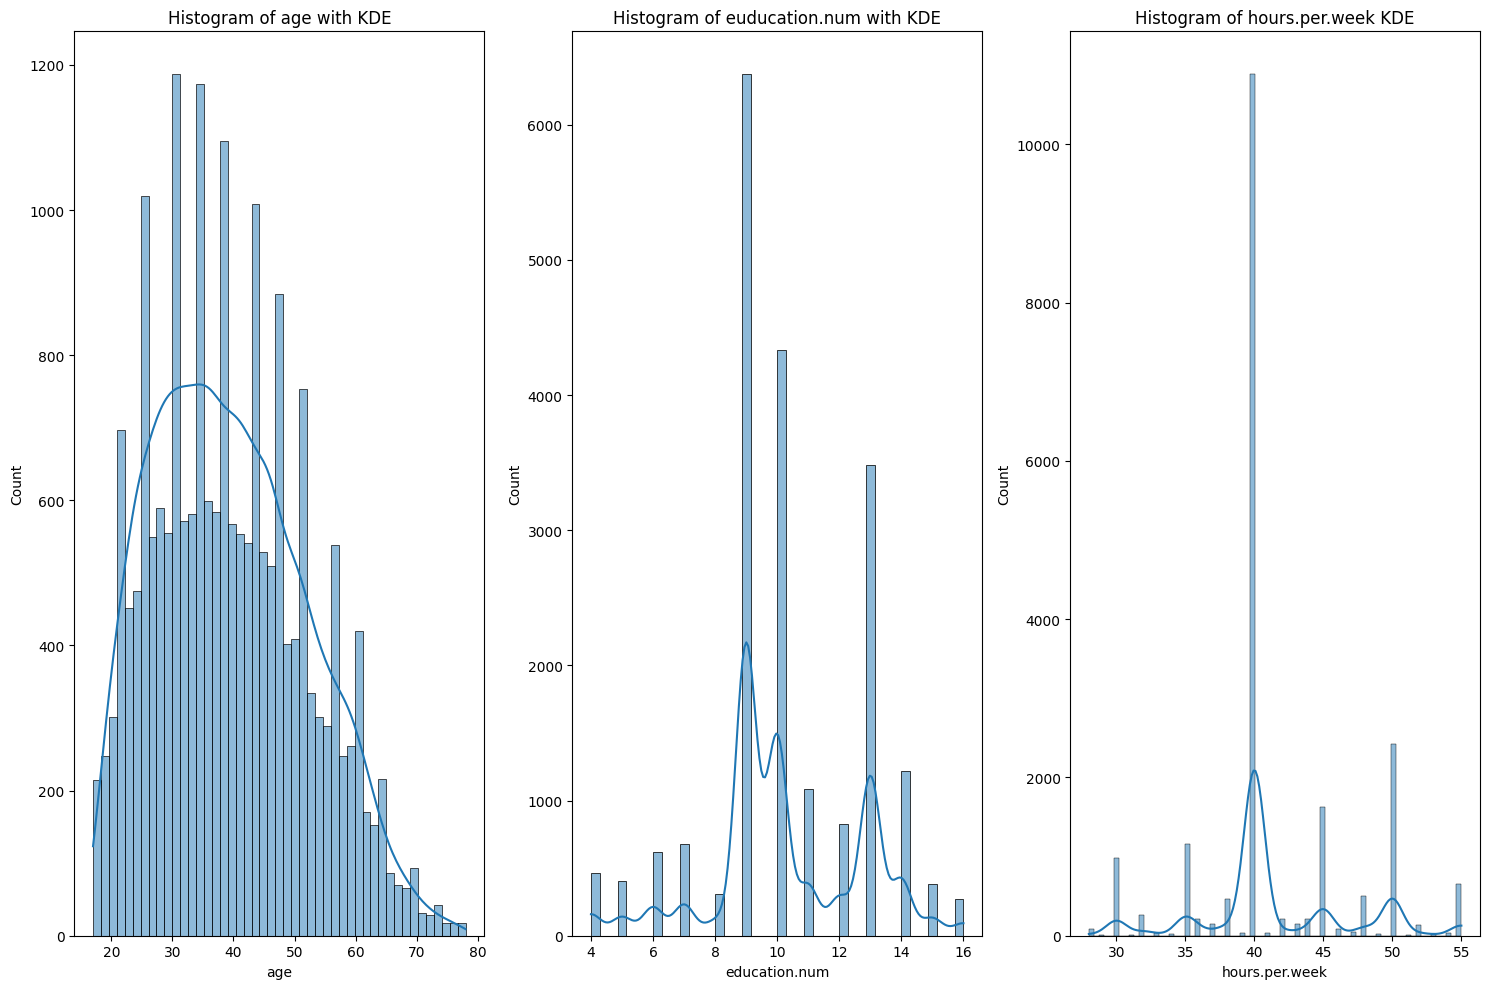

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 10))

# Histplot with KDE on each subplot
sns.histplot(data['age'], kde=True, ax=axes[0]).set(title='Histogram of age with KDE')
sns.histplot(data['education.num'], kde=True, ax=axes[1]).set(title='Histogram of euducation.num with KDE')

sns.histplot(data['hours.per.week'], kde=True, ax=axes[2]).set(title='Histogram of hours.per.week KDE')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


st_scaler = StandardScaler()
min_max_sclaer =MinMaxScaler()
data[continous_columns]=min_max_sclaer.fit_transform(data[continous_columns])




SPLITTING DATA FOR TESTING AND TRAINING

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['income'])
y = data['income']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)




**MODEL**

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

EVALUATING THE MODEL

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

print("The model accuracy_score is ",f"{accuracy_score(y_test,y_predict):.2f}")


The model accuracy_score is  0.79
